**IMDB** **dataset** **having** **50K** **movie** **reviews** **for** **natural** **language** **processing** 
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms. 

In [ ]:
import numpy as np   # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df=pd.read_csv('/content/IMDB-Dataset.csv')

In [ ]:
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.isnull().any()

review       False
sentiment    False
dtype: bool

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.sentiment.replace('positive',1,inplace=True)
df.sentiment.replace('negative',0,inplace=True)
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [ ]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa


**CLEAN THE DATA:-**
**REMOVE HTML TAGS**






In [ ]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
 
df.review = df.review.apply(clean)
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

**REMOVE SPECIAL CHARACTERS**

In [ ]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df.review = df.review.apply(is_special)
df.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

**CONVERT TO LOWERCASE**

In [ ]:
def to_lower(text):
    return text.lower()

df.review = df.review.apply(to_lower)
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

**CONVERT TO UPPERCASE**

In [ ]:
def to_upper(text):
    return text.upper()

df.review = df.review.apply(to_upper)
df.review[0]

'ONE OF THE OTHER REVIEWERS HAS MENTIONED THAT AFTER WATCHING JUST 1 OZ EPISODE YOU LL BE HOOKED  THEY ARE RIGHT  AS THIS IS EXACTLY WHAT HAPPENED WITH ME THE FIRST THING THAT STRUCK ME ABOUT OZ WAS ITS BRUTALITY AND UNFLINCHING SCENES OF VIOLENCE  WHICH SET IN RIGHT FROM THE WORD GO  TRUST ME  THIS IS NOT A SHOW FOR THE FAINT HEARTED OR TIMID  THIS SHOW PULLS NO PUNCHES WITH REGARDS TO DRUGS  SEX OR VIOLENCE  ITS IS HARDCORE  IN THE CLASSIC USE OF THE WORD IT IS CALLED OZ AS THAT IS THE NICKNAME GIVEN TO THE OSWALD MAXIMUM SECURITY STATE PENITENTARY  IT FOCUSES MAINLY ON EMERALD CITY  AN EXPERIMENTAL SECTION OF THE PRISON WHERE ALL THE CELLS HAVE GLASS FRONTS AND FACE INWARDS  SO PRIVACY IS NOT HIGH ON THE AGENDA  EM CITY IS HOME TO MANY  ARYANS  MUSLIMS  GANGSTAS  LATINOS  CHRISTIANS  ITALIANS  IRISH AND MORE    SO SCUFFLES  DEATH STARES  DODGY DEALINGS AND SHADY AGREEMENTS ARE NEVER FAR AWAY I WOULD SAY THE MAIN APPEAL OF THE SHOW IS DUE TO THE FACT THAT IT GOES WHERE OTHER SHOWS WO

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

 
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**STOPWORDS**

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'s', "you'll", 'only', 'for', 'very', "wouldn't", 'being', 'be', 'these', 'how', 'himself', 'while', 'so', "it's", 'of', 'we', 'ourselves', 'not', 'at', 'did', 'a', 'own', 'no', "shouldn't", 'they', 'each', 're', 'are', 'down', 'who', 'hasn', "mightn't", 'here', 'this', 'haven', 'been', 'after', 'off', 'isn', 'until', 'have', 'about', 'that', 'all', 'few', "needn't", "don't", 'y', 'my', 'will', 'mustn', 'over', 'themselves', 'up', 'them', 'whom', 'itself', "you're", 'wouldn', 'does', 'the', 'having', 'm', 'shouldn', 't', "won't", 'i', 'by', "weren't", 'had', 'with', 'to', 'then', 'theirs', 'there', 'now', "doesn't", 'was', 'if', 've', 'won', "isn't", "haven't", 'just', 'aren', 'wasn', "hadn't", 'when', "you've", 'me', 'yourself', "couldn't", 'she', 'more', "shan't", 'your', 'can', 'out', 'any', 'too', 'o', 'weren', 'both', 'were', 'most', 'her', 'is', 'yourselves', 'don', "she's", 'what', 'from', 'through', 'his', 'but', 'some', 'should', 'him', 'an', 'on', 'ain', 'ma', "mustn't", 'ou

**REMOVE STOPWORDS**

In [ ]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.review = df.review.apply(rem_stopwords)
df.review[0]

['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 'hooked',
 'They',
 'right',
 'exactly',
 'happened',
 'The',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'This',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'Its',
 'hardcore',
 'classic',
 'use',
 'word',
 'It',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'many',
 'Aryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'I',
 'would',
 'say',
 'main',
 'appe

**STEM THE WORDS**

In [ ]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df.review = df.review.apply(stem_txt)
df.review[0]

'one review mention watch 1 oz episod hook they right exact happen the first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid this show pull punch regard drug sex violenc it hardcor classic use word it call oz nicknam given oswald maximum secur state penitentari it focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away i would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around the first episod i ever saw struck nasti surreal i say i readi i watch i develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort

In [ ]:
df.head()

,review,sentiment
0,one of the other review has mention that after...,1
1,a wonder littl product the film techniqu is ve...,1
2,i thought this was a wonder way to spend time ...,1
3,basic there s a famili where a littl boy jake ...,0
4,petter mattei s love in the time of money is a...,1


**CREATING THE MODEL**


**CREATING BAG OF WORDS**

In [ ]:
X = np.array(df.iloc[:,0].values)
y = np.array(df.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


**TRAIN TEST SPLIT**

In [ ]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


**DEFINING  THE MODELS AND TRAIN THEM**

In [ ]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)
bnb.fit(trainx,trainy)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

**PREDICTION AND METRICS TO CHOOSE BEST MODEL**

In [ ]:
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))
print("Bernoulli = ",accuracy_score(testy,ypb))

Gaussian =  0.7829
Multinomial =  0.8292
Bernoulli =  0.8365


In [ ]:
pickle.dump(bnb,open('model1.pkl','wb'))
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))
#np.array(bow).reshape(1,3000)
#bow.shape
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))
inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = bnb.predict(np.array(inp).reshape(1,1000))


NameError: ignored

**FINDING LENGTH**

In [ ]:
print(len(trainx))


40000


In [ ]:
print(len(trainy))


40000


**PLOTTING A GRAPH**

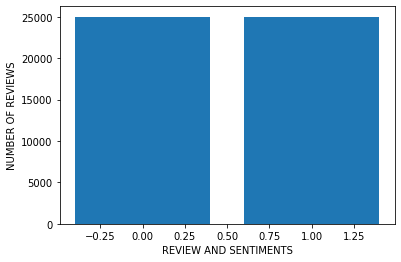

In [ ]:
import matplotlib.pyplot as plt
sentiment_count = df.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['review'])
plt.xlabel('REVIEW AND SENTIMENTS')
plt.ylabel('NUMBER OF REVIEWS')
plt.show()

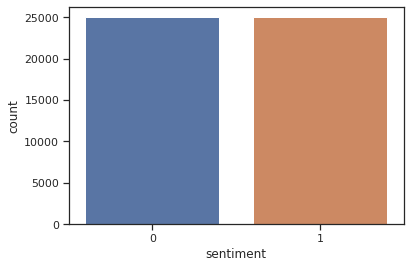

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.countplot(x='sentiment', data=df)

In [ ]:
import nltk

from nltk.tokenize import word_tokenize

**Labeling the sentiment text**

In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_df=lb.fit_transform(df['sentiment'])
print(sentiment_df.shape)

(50000, 1)


**TOKENIZATION** **OF WORDS**

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
import spacy
 
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

In [ ]:
tokenizers=ToktokTokenizer()

In [ ]:
from nltk.tokenize import sent_tokenize
text="""If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br """
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['If you like original gut wrenching laughter you will like this movie.', 'If you are young or old then you will love this movie, hell even my mom liked it.<br /><br']


**STEMMING THE TEXT**

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

In [ ]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook they...,1
1,a wonder littl product the film techniqu unass...,1
2,i thought wonder way spend time hot summer wee...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


**LEMMATIZATION**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmati = WordNetLemmatizer()

print("Lions :" , lemmati. lemmatize("Lion"))
print("Pandas :" , lemmati.lemmatize("Panda"))


Lions : Lion
Pandas : Panda


**MODELLING THE DATASET**

In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(trainx,trainy)
print(lr_bow)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Logistic regression model performance on test datase**t

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(testx)
print(lr_bow_predict)

[0 1 1 ... 0 1 0]


**Accuracy of the model**

In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(testy,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8612


**CLASSIFICATION REPORT**

In [ ]:
#Classification report for bag of words 
lr_bow_report=classification_report(testy,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.87      0.85      0.86      5023
    Negative       0.85      0.87      0.86      4977

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**CONFUSION MATRIX**

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(testy,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[4337  640]
 [ 748 4275]]


**Stochastic gradient descent machines for bag of words**

In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for bag of words
svm_bow=svm.fit(trainx,trainy)
print(svm_bow)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


**THE** **END** 